In [2]:
import os
import cv2
import torch
from tqdm import tqdm
#from demo.image_matting.colab.inference2 import run
from PIL import Image
from torchvision import transforms
import numpy as np
file_path = '/home/jini1114/git/MODNet/input'
temp_dir = '/home/jini1114/git/MODNet/output'
path_in = '/home/jini1114/git/MODNet/temp'
path_out = '/home/jini1114/git/MODNet/mp4'
fps = 60

model = torch.hub.load('pytorch/vision:v0.9.0', 'deeplabv3_resnet101', pretrained=True)
model.eval()

def inference(input_image) :
    preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    input_tensor = preprocess(np.array(input_image))
    input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

    # move the input and model to GPU for speed if available
    if torch.cuda.is_available():
        input_batch = input_batch.to('cuda')
        model.to('cuda')

    with torch.no_grad():
        output = model(input_batch)['out'][0]
    output_predictions = output.argmax(0)
    # create a color pallette, selecting a color for each class
    palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
    colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
    colors = (colors % 255).numpy().astype("uint8")

    # plot the semantic segmentation predictions of 21 classes in each color
    r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(input_image.size)
    r.putpalette(colors)
    return r

input_lists = os.listdir(file_path)



Using cache found in /home/jini1114/.cache/torch/hub/pytorch_vision_v0.9.0


In [3]:

files = os.listdir(temp_dir)
    


In [7]:

img = cv2.imread(os.path.join(temp_dir,'%d.jpg'%(0)))

In [8]:
img.shape

(580, 920, 3)

In [22]:
input_image = np.array(img)
preprocess = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

input_tensor = preprocess(np.array(input_image))
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)['out'][0]
output_predictions = output.argmax(0)
# create a color pallette, selecting a color for each class
palette = torch.tensor([2 ** 25 - 1, 2 ** 15 - 1, 2 ** 21 - 1])
colors = torch.as_tensor([i for i in range(21)])[:, None] * palette
colors = (colors % 255).numpy().astype("uint8")

# plot the semantic segmentation predictions of 21 classes in each color
r = Image.fromarray(output_predictions.byte().cpu().numpy()).resize(img.shape[:2])
r.putpalette(colors)

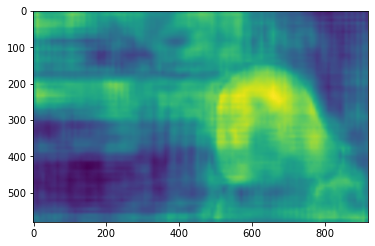

In [32]:
import matplotlib.pyplot as plt
plt.imshow(output.cpu().numpy()[4])

In [ ]:
cv2.imwrite(os.path.join(path_in,'%d.jpg'%(idx)),res)

In [8]:
import os
from tqdm import tqdm
#from demo.image_matting.colab.inference2 import run
import numpy as np
ori_dir = '/home/jini1114/git/MODNet/input'
jpg_dir = '/home/jini1114/git/MODNet/output'
png_dir = '/home/jini1114/git/MODNet/temp'
tr_data_dir = '/home/jini1114/git/MODNet/data'
out_dir = '/home/jini1114/git/MODNet/mp4'

folders = os.listdir(jpg_dir)
for folder in folders:
    files = os.listdir(os.path.join(jpg_dir,folder))
    if not(os.path.exists(os.path.join(tr_data_dir,folder))):
        os.system('mkdir -p '+os.path.join(tr_data_dir,folder,"Images"))
        os.system('mkdir -p '+os.path.join(tr_data_dir,folder,"Masks"))
    for idx in tqdm(range(len(files))):
        if idx%100 == 0:
            os.system('cp '+os.path.join(jpg_dir,folder,files[idx])+' '+os.path.join(tr_data_dir,folder,'Images',files[idx]))
            os.system('cp '+os.path.join(png_dir,folder,files[idx][:-3]+'png')+' '+os.path.join(tr_data_dir,folder,'Masks',files[idx][:-3]+'png'))


In [12]:
folders = os.listdir(jpg_dir)
for folder in folders:
    files = os.listdir(os.path.join(jpg_dir,folder))
    if not(os.path.exists(os.path.join(tr_data_dir,folder))):
        os.system('mkdir -p '+os.path.join(tr_data_dir,folder,"Images"))
        os.system('mkdir -p '+os.path.join(tr_data_dir,folder,"Masks"))
    for idx in tqdm(range(len(files))):
        if idx%100 == 0:
            os.system('cp '+os.path.join(jpg_dir,folder,files[idx])+' '+os.path.join(tr_data_dir,folder,'Images',files[idx]))
            os.system('cp '+os.path.join(png_dir,folder,files[idx][:-3]+'png')+' '+os.path.join(tr_data_dir,folder,'Masks',files[idx][:-3]+'png'))


100%|██████████| 31198/31198 [00:07<00:00, 4331.32it/s]


In [11]:
os.path.join(png_dir,folder,files[idx][:-3]+'.png')

'/home/jini1114/git/MODNet/temp/r_릴파.mp4/23474..png'

In [66]:
import os
import cv2
import torch
from tqdm import tqdm
#from demo.image_matting.colab.inference2 import run
from PIL import Image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
file_path = '/home/jini1114/git/data/input'
temp_dir = '/home/jini1114/git/data/output'
path_in = '/home/jini1114/git/data/temp'
path_out = '/home/jini1114/git/data/mp4'
seg_dir='/home/jini1114/git/data/segmentation'
fps = 60

In [67]:
files = os.listdir(file_path)

folder = files[0]
# define blue color range   
light_blue = np.array([250])
dark_blue = np.array([0])



if not(os.path.exists(os.path.join(seg_dir,folder))):
    os.system('mkdir -p '+os.path.join(seg_dir,folder))

frames = []

images = os.listdir(os.path.join(temp_dir,folder))
for idx in tqdm(range(len(images))):
    temp = cv2.imread(os.path.join(temp_dir,folder,'%d.jpg'%(idx)))
    gray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
    mask = cv2.inRange(gray, dark_blue, light_blue)
    cv2.imwrite(os.path.join(seg_dir,folder,'%d.png'%(idx)),
                    mask)
    



100%|██████████| 19202/19202 [01:45<00:00, 182.56it/s]


In [70]:

seg_dir='/home/jini1114/git/data/segmentation'
seg_dir = os.path.join(seg_dir,folder)
frames = []

files = os.listdir(seg_dir)
for idx in tqdm(range(len(files)),desc = 'frame loading'):
    modnet = cv2.imread(os.path.join(seg_dir,'%d.png'%(idx)))
    '''
    gray = cv2.cvtColor(modnet, cv2.COLOR_RGB2GRAY)
    res = cv2.findContours(gray.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = res[-2]
    contours = scale_contour(contours,0.9)
    cv2.drawContours(modnet, contours, contourIdx=-1, color=(255,255,255),thickness=-1)
    '''
    frames.append(modnet.astype(np.uint8))

h,w,l = modnet.shape
size = (w,h)


frame loading: 100%|██████████| 19202/19202 [00:46<00:00, 410.17it/s]


NameError: name 'out_dir' is not defined

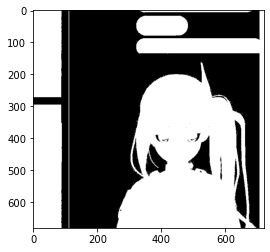

In [76]:
plt.imshow(modnet)

In [71]:

output = cv2.VideoWriter(os.path.join(path_out,'test,mp4'),cv2.VideoWriter_fourcc(*'DIVX'),fps,size)

for i in tqdm(range(len(frames)),desc = 'mp4 making'):
    output.write(frames[i])

output.release()

mp4 making: 100%|██████████| 19202/19202 [00:00<00:00, 647810.38it/s]


In [73]:
frames[0].shape

(680, 720, 3)

In [26]:
temp = cv2.imread(os.path.join(temp_dir,file,images[0]))

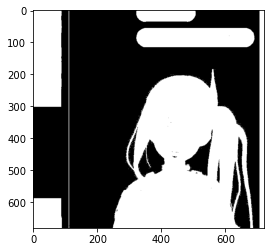

In [49]:
gray = cv2.cvtColor(temp,cv2.COLOR_BGR2GRAY)
# define blue color range
light_blue = np.array([250])
dark_blue = np.array([0])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(gray, dark_blue, light_blue)


In [51]:
mask.shape

(680, 720)

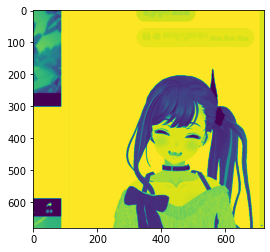

In [42]:
plt.imshow(gray)

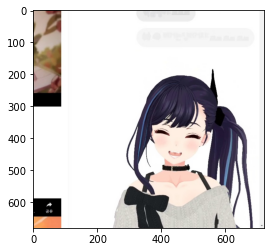

In [38]:
plt.imshow(hsv)

In [9]:
for image in images:
    

['13872.jpg',
 '2878.jpg',
 '2043.jpg',
 '5350.jpg',
 '12941.jpg',
 '12564.jpg',
 '13643.jpg',
 '2765.jpg',
 '13603.jpg',
 '7401.jpg',
 '12879.jpg',
 '14753.jpg',
 '116.jpg',
 '11435.jpg',
 '1706.jpg',
 '8646.jpg',
 '10320.jpg',
 '6002.jpg',
 '9082.jpg',
 '9682.jpg',
 '13349.jpg',
 '3706.jpg',
 '6297.jpg',
 '5079.jpg',
 '5110.jpg',
 '2041.jpg',
 '10638.jpg',
 '9055.jpg',
 '14573.jpg',
 '8136.jpg',
 '4115.jpg',
 '427.jpg',
 '14529.jpg',
 '13383.jpg',
 '4537.jpg',
 '3455.jpg',
 '7252.jpg',
 '6926.jpg',
 '12393.jpg',
 '3593.jpg',
 '3141.jpg',
 '9267.jpg',
 '7794.jpg',
 '8494.jpg',
 '5084.jpg',
 '5274.jpg',
 '10651.jpg',
 '7632.jpg',
 '4068.jpg',
 '8631.jpg',
 '2057.jpg',
 '6376.jpg',
 '6410.jpg',
 '7692.jpg',
 '602.jpg',
 '12532.jpg',
 '877.jpg',
 '13051.jpg',
 '4096.jpg',
 '8332.jpg',
 '6576.jpg',
 '1982.jpg',
 '12760.jpg',
 '2669.jpg',
 '2291.jpg',
 '1636.jpg',
 '14653.jpg',
 '5876.jpg',
 '2897.jpg',
 '2859.jpg',
 '1367.jpg',
 '3697.jpg',
 '1551.jpg',
 '10364.jpg',
 '6358.jpg',
 '6766.j

In [1]:
import os
import subprocess

In [2]:
file_name = '/home/jini1114/git/data/input/r_cut_ine.mp4'

file_names = file_name.split('/')
origin_file_name = file_names[-1]
wav_dir = os.path.join('/home/jini1114/git/mdx-net-submission/data','test',origin_file_name)


command = "ffmpeg -i {} -ac 2 -f wav {}".format(file_name, os.path.join(wav_dir, 'mixture.wav'))
subprocess.call(command, shell=True)

0

In [4]:
import os
import cv2
from tqdm import tqdm
import numpy as np

img_dir = '/home/jini1114/git/data/segmentation/r_cut_ine.mp4/'
files = os.listdir(img_dir)

for file in tqdm(files):
    temp = cv2.imread(os.path.join(img_dir,file))
    temp = temp*255
    gray = temp[:,:,0]
    res = cv2.findContours(gray.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
    contours = res[-2]
    area = []
    for i in range(len(contours)):
        area.append(cv2.contourArea(contours[i]))
    try:
        idx = np.where(np.max(area)==area)[0][0]
        cv2.drawContours(temp, contours, contourIdx=idx, color=(255,255,255),thickness=-1)
    except :
        pass

    cv2.imwrite(os.path.join('/home/jini1114/git/data/dataset/temp_ful',file),temp)


100%|██████████| 20702/20702 [02:11<00:00, 156.92it/s]


In [2]:
temp.shape

(680, 720, 3)